<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_cd.png">

# Proyecto de Machine Learning:  Prediccion de precios de casas

	
Pasos principales que deberá seguir:


1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)

## 1. Mira el panorama general y entiende el problema

<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  Predicción de precios de casas California (EE.UU) </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/real_state.jpg" align="middle" style="width:550px;"/></td>
<td>

Para este proyecto suponga que es un científico de datos recientemente contratado en una empresa de bienes raíces
    
La primera tarea que debe realizar es crear un modelo de precios de la vivienda en California utilizando los datos del censo de California. Estos datos tienen métricas como la población, el ingreso medio, el precio medio de la vivienda, etc. para cada grupo de bloques en California.
    
    
Los grupos de bloques son la unidad geográfica más pequeña para la cual la Oficina del Censo de los Estados Unidos publica datos de muestra (un grupo de bloques generalmente tiene una población de 600 a 3,000 personas). Simplemente los llamaremos "distritos" para abreviar.
    
    
Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las otras métricas
   
<br>
</td>
</tr>
</table>

<div class="alert alert-info">
<b> </b>:

 <ul>
  <li> ¿Cuál es exactamente el objetivo comercial? </li>
  <li> ¿Será la construcción de un modelo? </li>
 <li> ¿Cómo espera la compañía usar y beneficiarse de este modelo? </li>
</ul>
    
R = Su jefe responde que su modelo, una predicción del precio medio de la vivienda de un distrito,  se enviará a otro sistema de Aprendizaje Automático , el cual junto con muchas otros parametros determinará si vale la pena invertir en un área determinada o no. Hacer esto bien es fundamental, ya que afecta directamente los ingresos.
 
<img src="figuras/real_state_diagram.jpg" align="middle" style="width:650px;" />
  <center> <strong><figcaption> Figura: Pipeline del problema</figcaption></center> </strong>
    
 <ul>
  <li> ¿Cómo es la solución actual? </li>
</ul>
R= Actualmente hay expertos en la empresa que estiman manualmente los precios de las viviendas del distrito y utilizan reglas complejas para obtener una estimación. Esto es costoso y requiere mucho tiempo, y sus estimaciones no son muy buenas; su tasa de error típica es de aproximadamente el 20%. Por esta razón la empresa considera que podría ser útil tener un modelo para predecir el precio medio de las casas de los diferentes distritos que se encuentran en los datos del censo, así como otros datos de importancia. 
</div>

<div class="alert alert-info">

<ul>
  <li> ¿Cuál será un buen parametro de medición del performance? </li>
</ul>

Se tienen los siguientes:
    
1. Root Mean Square Error (RMSE)
\begin{equation*}
\textrm{RMSE} ( \mathbf{X} ,h) = \sqrt{ \frac{1}{m}\sum_{i=1}^{m} (h( \mathbf{x}^{(i)} - y^{(i)}))^2}
\end{equation*}
     
2. Mean Absolute Error (MAE)
\begin{equation*}
\textrm{MAE} ( \mathbf{X} ,h) =  \frac{1}{m}\sum_{i=1}^{m} \bigg| h(\mathbf{x}^{(i)}) - y^{(i)} \bigg|
\end{equation*}

Ambas ecuaciones introducen varios parametros comunes utilizados en problemas de Machine Learning que se estarán utilizando.

<ul>
  <li> $m$ es el numero de instancias, por ejemplo para una muestra de 2000 distritos, $m=2000$ </li>
</ul>

<ul>
  <li> $\mathbf{x}^{(i)}$ es el vector que contiene todas las caracteristicas  de cada una de la instancias ($i$), y $y^{(i)}$ es el valor de nuestro parámetro de interés (etiqueta).  </li>
</ul>
    
    
Por ejemplo, si el primer distrito en el conjunto de datos se encuentra en la longitud –118.29°, latitud 33.91°, y tiene 1,416 habitantes con un ingreso promedio de 38,372 USD, y el valor promedio de la casa es 156,400 USD, entonces:

\begin{equation*}
\mathbf{x}^{(1)}
=
\begin{pmatrix}
–118.29 \\
33.91 \\
1,416 \\
38,372 
\end{pmatrix}
\end{equation*}

\begin{equation*}
y^{(1)} = 156,400
\end{equation*}    
    
<ul>
  <li> $ \mathbf{X} $ Es la matriz que contiene todos los valores de las instancias en el dataset(muestra). Los valores de cada instancia se sitúan en las filas de la matriz. </li>
</ul>    

\begin{equation*}
\mathbf{X} 
=
\begin{pmatrix}
(\mathbf{x}^{(1)})^\top \\
(\mathbf{x}^{(2)})^\top\\
 \vdots \\
(\mathbf{x}^{(1999)})^\top \\
(\mathbf{x}^{(2000)})^\top
\end{pmatrix}
=
\begin{pmatrix}
–118.29  & 33.91 &  1,416 & 38,372      \\
\vdots  & \vdots &  \vdots & \vdots   
\end{pmatrix}
\end{equation*}

<ul>
  <li> $ h $ es la función de predicción de su sistema, también llamada hipótesis. Cuando el sistema recibe el vector de características $\mathbf{x}^{(i)}$  de una instancia, genera un valor de prediccion $\hat{y}^{(i)} = h (\mathbf{x}^{(i)})$ para esa instancia ($\hat{y}$ se pronuncia "y-sombrero o hat").. </li> 
Por ejemplo, si el sistema predice que el precio medio de la vivienda en el primer distrito es de 158,400USD , entonces $\hat{y}^{(1)} = h (\mathbf{x}^{(1)})$ = 158,400.
</ul>   



NOTA: Usaremos letras cursiva en minúscula para valores escalares (como $m$ o $y^{(i)}$) y nombres de funciones (como $h$),  letras en negritas en minúscula para vectores (como $\mathbf{x}^{(i)}$) y fuente en negrita en mayúscula para matrices (como $\mathbf{X}$)

</div>

## 2. Obtenga los datos

In [1]:
#Librerias principales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#Cargar el archivo "datos/info_Casas_SF.csv"
df = pd.read_csv('datos/info_Casas_SF.csv')

## 3. Descubra y visualice los datos para obtener información.


In [4]:
# Mostrar los primeras filas
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Información general 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20635 non-null  float64
 1   latitude            20635 non-null  float64
 2   housing_median_age  20635 non-null  float64
 3   total_rooms         20635 non-null  float64
 4   total_bedrooms      20428 non-null  float64
 5   population          20635 non-null  float64
 6   households          20635 non-null  float64
 7   median_income       20635 non-null  float64
 8   median_house_value  20635 non-null  float64
 9   ocean_proximity     20635 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Mostrar el número de filas y columnas
df.shape

(20635, 10)

In [6]:
# Mostrar el tipo de variables
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN'], dtype=object)

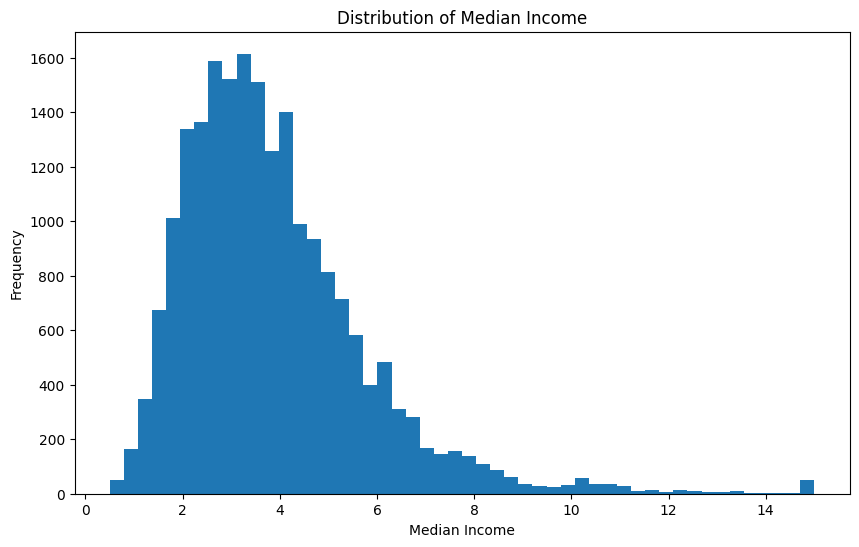

In [8]:
# Graficar el promedio de ingresos
df['median_income'].plot(kind='hist', bins=50, figsize=(10, 6))
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Distribution of Median Income')
plt.show()


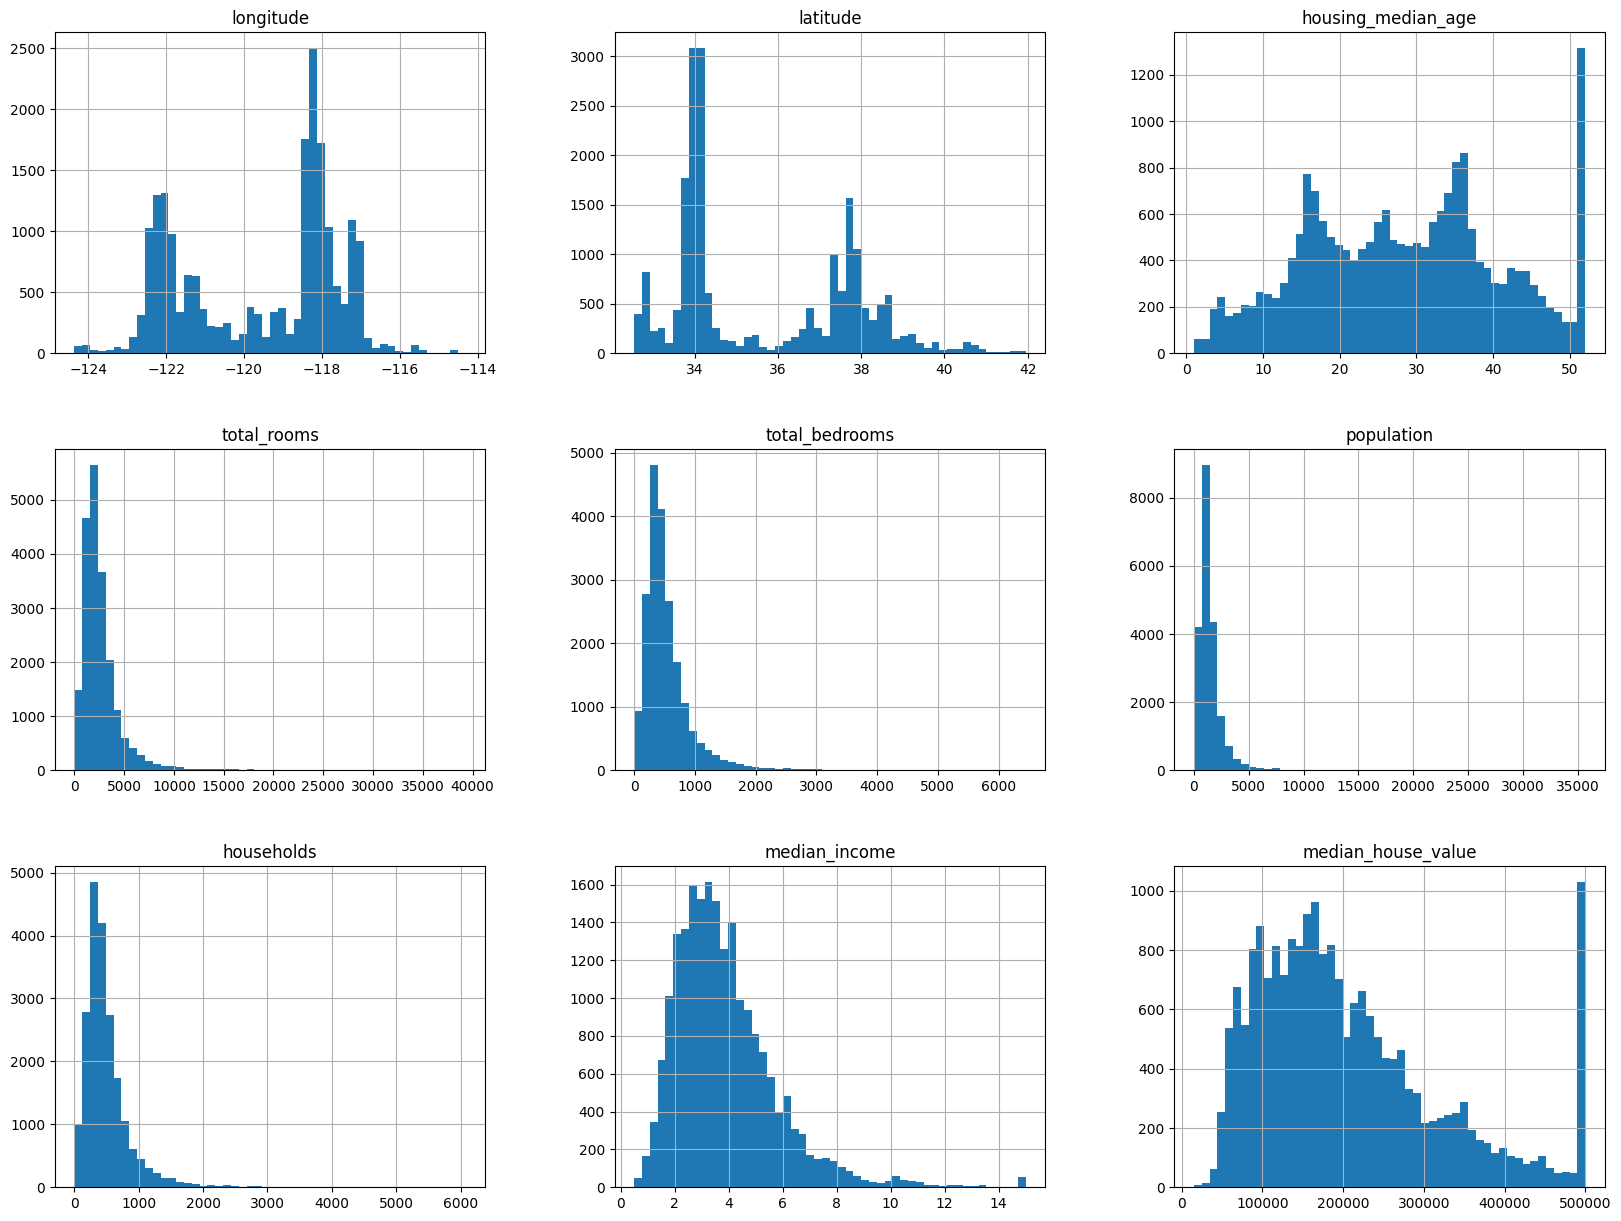

In [9]:
#Graficar todas las variables numericas 
df.hist(bins=50, figsize=(20, 15))
plt.show()


#### Mapa de California

<img src="figuras/CaliforniaMapa.png" align="middle" style="width:550px;" />

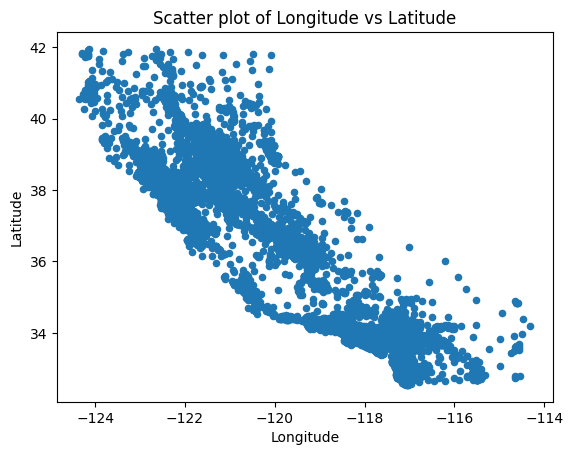

In [10]:
# Hacer una grafica de dispersión con la longitud en X y la latitud en Y.
df.plot(kind='scatter', x='longitude', y='latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Longitude vs Latitude')
plt.show()


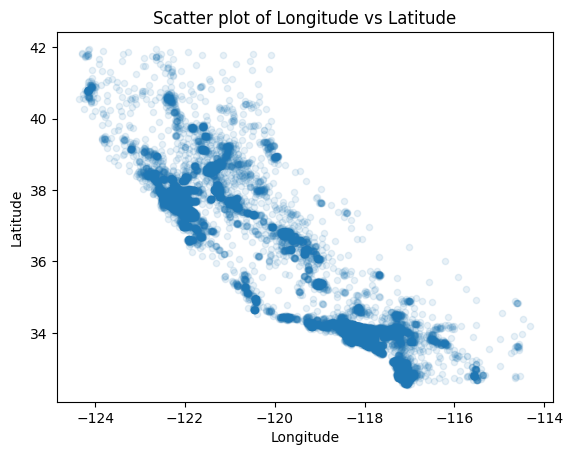

In [11]:
#Agregar alpha=0.1
# Hacer una grafica de dispersión con la longitud en X y la latitud en Y.
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Longitude vs Latitude')
plt.show()

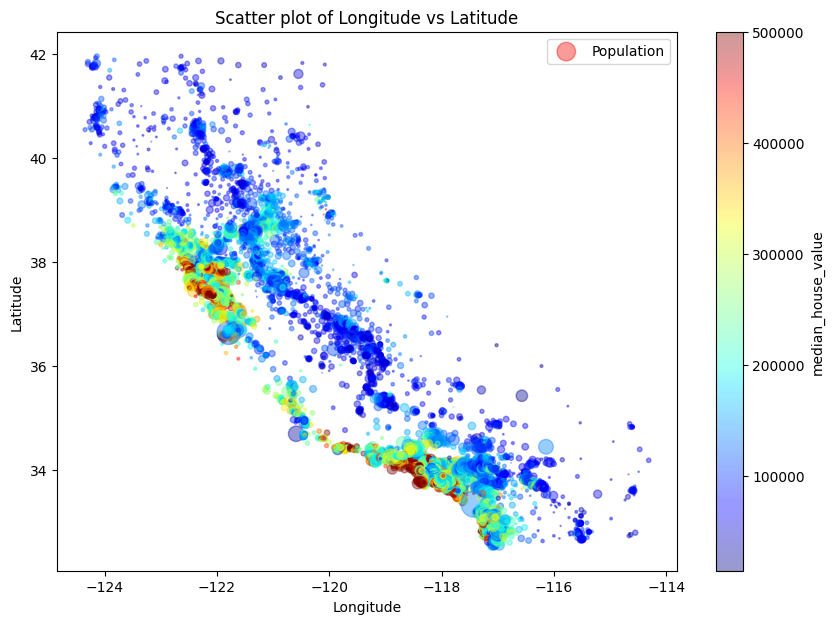

In [12]:
#Cambiar el tamaño del punto y agregar una escala de medición
#s : Tamaño de cada punto
#c : Etiqueta
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
  s=df['population']/100, label='Population', figsize=(10,7),
  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Longitude vs Latitude')
plt.legend()
plt.show()


In [13]:
#pip install colorspacious
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
%pip install colorspacious

Note: you may need to restart the kernel to use updated packages.


### Correlación de variables

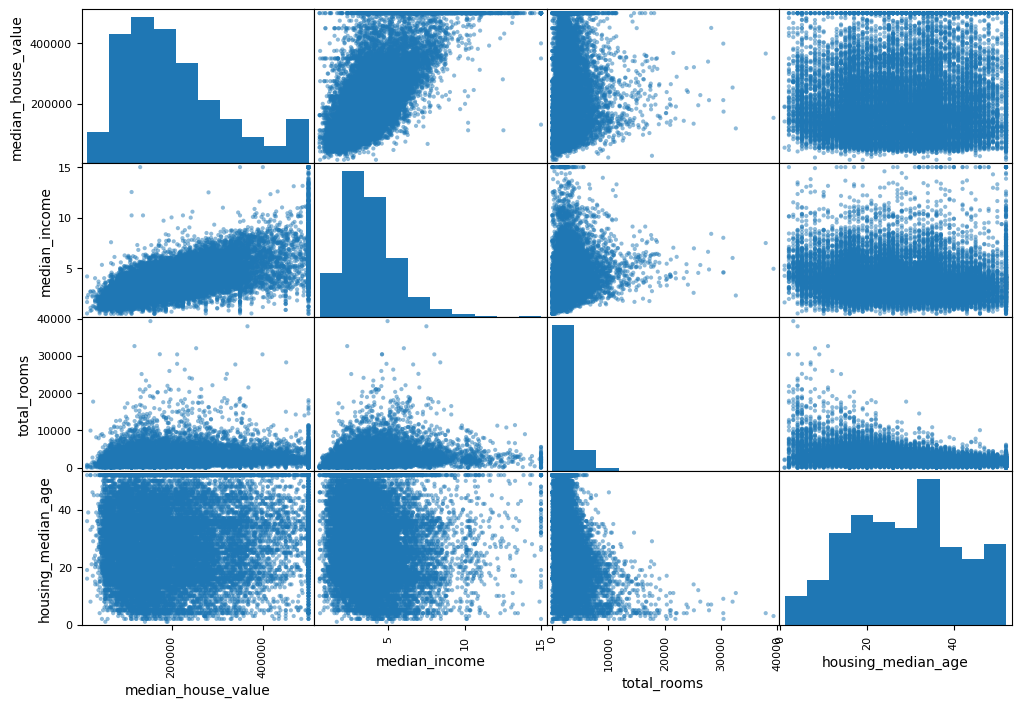

In [14]:
#Hacer diagramas de correlación
# Definir una lista llamada atributos  con las siguientes variables : 
# "median_house_value", "median_income", "total_rooms","housing_median_age"
from pandas.plotting import scatter_matrix

atributos = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df[atributos], figsize=(12, 8))
plt.show()



In [15]:
# Definir una nueva columna llamada 'bed_rooms_per_room' y asignarle el valor de la division de
# la variables total_bedrooms con total_rooms
df['bed_rooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_rooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797


In [16]:
atributos=["median_house_value",
           "median_income",
           "bed_rooms_per_room",
           "total_rooms",
           "housing_median_age"]

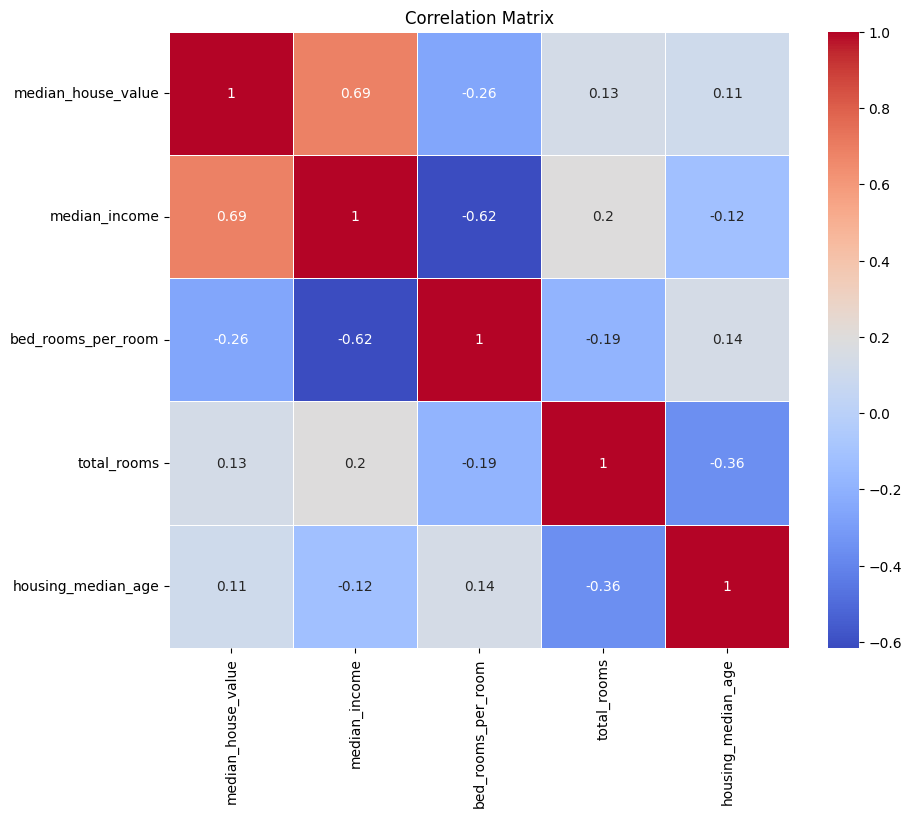

In [17]:
# Matriz correlación númerica y visual
#https://matplotlib.org/tutorials/colors/colormaps.html
#Instalación de seaborn
#pip install seaborn
import seaborn as sn
# Calcular la matriz de correlación
corr_matrix = df[atributos].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## 4. Prepare los datos y sus transformadores 

In [18]:
#Revisar si hay datos perdidos NaN


In [19]:
#Número de filas


In [20]:
# eliminar datos  perdidos NaN


**Tipos de variables**

<img src="figuras/categarical_variables.jpg" align="middle" style="width:550px;" />

In [21]:
# Revisar nuevamente la colcountsumna 'ocean_proximity'
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [22]:
#Importamos la funcion OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

nominal_codificator = OneHotEncoder(sparse_output=False)
nominal_codificator.fit_transform(df.ocean_proximity.to_frame())

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [23]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bed_rooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.224625
20631,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.215208
20632,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.215173
20633,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.219892


In [ ]:
## Ejemplo codificacion Ordinal
#from sklearn.preprocessing import OrdinalEncoder
#O_codificador = OrdinalEncoder()
#O_codificadir.fit_transform(df[["ocean_proximity"]])
#O_codificadir.categories_



###  ColumnTransformer  y pipeline

<img src="figuras/pipeline.jpg" align="middle" style="width:500px;" />

#### Pipeline

El *pipeline* en scikit-learn es una herramienta que facilita el flujo de trabajo de modelos de aprendizaje automático al encadenar múltiples pasos de procesamiento y modelado en una sola estructura. Esto permite que las transformaciones de los datos y la aplicación del modelo se realicen de manera secuencial, lo cual es muy útil para simplificar y organizar tu código.

Un pipeline se define en scikit-learn utilizando la clase Pipeline, y se puede construir como una secuencia de pasos, donde cada paso está compuesto por un nombre y un estimador de scikit-learn. Estos estimadores pueden ser transformadores (como escaladores, transformadores de características, etc.) o modelos predictivos (como regresores o clasificadores)

Por ejemplo, si quisieras agregar un modelo de regresión lineal después de la estandarización, tu pipeline podría verse así:
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [24]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# Crear la lista de  viriables numericas y categoricas
# Númericas: 'median_income', 'total_rooms','housing_median_age','bed_rooms_per_room'
# Categoricas: 'ocean_proximity'



In [ ]:
# Mostrar las columnas del dataframe


In [ ]:
# Crear el pipeline de preprocesamiento para datos numéricos y categóricos.



#### ColumnTransformer


ColumnTransformer es una clase de scikit-learn que  permite aplicar transformaciones de preparación de datos de forma selectiva.

Por ejemplo,  permite aplicar una transformación específica o secuencia de transformaciones solo a las columnas numéricas, y una secuencia separada de transformaciones solo a las columnas categóricas.

Para usar ColumnTransformer, debe especificar una lista de transformadores.

Cada transformador es una tupla de tres elementos que define el nombre del transformador, la transformación a aplicar y los índices de columna a los que aplicar. Por ejemplo: **(Nombre, objeto, columnas)**

Ejemplo de uso:
```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

column_transformer = ColumnTransformer([
    ('scaler', StandardScaler(), ['numerical_column_1', 'numerical_column_2']),
    ('encoder', OneHotEncoder(), ['categorical_column'])
])


In [ ]:
# Definir los transformadores


In [ ]:
#Tener presente este orden numerico + categotico

### Preparando las muestras de entrenamiento y prueba

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">


División general de los datos
* **X**: Datos  sin la columna "median_house_value""
* **y**: Datos con la columna "median_house_value"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [ ]:
# Crear X (Quitar la columna o campo de "median_house_value")


In [ ]:
# Crear y (Valor de de la columna "median_house_value")


In [ ]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split


In [ ]:
# Revise  el tamaño de cada muestra


## 5.  Seleccione algunos modelos y realice el entrenamiento (train).


In [ ]:
# Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression


In [ ]:
#1. Nombrar una variable para LinearRegression()


In [ ]:
#2. Definir el Pipeline : Transformación  + modelo


In [ ]:
#3. Prediccioón del modelo


In [ ]:
#Probamos en unas pocas instancias 


In [ ]:
#Comparamos con los valores reales


#### Cross validation


La validación cruzada o  cross validation  (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de remuestreo utilizado para evaluar un modelo si tenemos datos limitados. 

Una manera de obtener las muestras es a traves del metodo del k-fold, el cual divide a los datos en k muestras como se muestra en la imagen (ejemplo con k=5) 

<img src="figuras/cross_validation.jpg" align="middle" style="width:550px;" />
   


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score
#https://github.com/scikit-learn/scikit-learn/issues/2439

#### Evaluación Linear Regression

In [ ]:
# Evaluadar el modelo usando crossvalidation
#https://scikit-learn.org/stable/modules/model_evaluation.html

#Evaluacion
# 4. Calcular el score con la validación cruzada CV=5
from sklearn.model_selection import cross_val_score


In [ ]:
# 5. Realizar el cambio de signo y sacar la raiz


In [ ]:
# 6.  Calcular mean y standard deviation


### DecisionTree

In [ ]:
#Aplicar el modelo de arboles de decision con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para DecisionTreeRegressor()



In [ ]:
#2. Definir el Pipeline : Transformación  + modelo



In [ ]:

#3. Ajustar el modelo


In [ ]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10


In [ ]:

# 5. Realizar el cambio de signo y sacar la raiz


In [ ]:

# 6. Mostrar el resultado usando la funcion display_scores


### RandomForest

In [ ]:
#Aplicar el modelo RandomForestRegressor
from sklearn.ensemble  import RandomForestRegressor

In [ ]:
#1. Nombrar una variable para nuestro modelo


In [ ]:
#2. Definir el Pipeline : Transformación  + modelo


In [ ]:
#3. Ajustar el modelo


In [ ]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10


In [ ]:
# 5. Realizar el cambio de signo y sacar la raiz


In [ ]:
# 6. Mostrar el resultado usando la funcion display_scores


#### Resumen

| Modelo o clasificador   |  Mean | Standard deviation  |
|---|---|---|
|  Linear Regression  |    |       |
|   DecisionTree |    |        |
|  Random Forest   |   |         |


In [ ]:
# Datos de evalación


In [ ]:
# Agregamos una grafica para comparar visualmente los resultados


# Hiperparámetros
Los **hiperparámetros** son configuraciones externas a un modelo de machine learning que se establecen antes de que comience el proceso de aprendizaje y no se ajustan automáticamente durante el entrenamiento. Son diferentes de los **parámetros** del modelo, que se aprenden a partir de los datos.

Los hiperparámetros pueden afectar el rendimiento y la velocidad del entrenamiento de un modelo, y se deben elegir cuidadosamente para optimizar el rendimiento. Hay dos tipos principales de hiperparámetros:

1. Hiperparámetros relacionados con la arquitectura del modelo:

* En redes neuronales, esto incluye el número de capas, el número de neuronas por capa, el tipo de función de activación, etc.
* En modelos como árboles de decisión, el número máximo de niveles del árbol o la profundidad máxima.

2. Hiperparámetros relacionados con el proceso de entrenamiento:

* Tasa de aprendizaje: controla el tamaño de los pasos que da el algoritmo al buscar el mínimo de la función de pérdida.
* Tamaño del lote: número de ejemplos que el modelo utiliza para actualizar los parámetros en cada iteración.
* Número de épocas: cantidad de veces que el modelo ve el conjunto completo de datos durante el entrenamiento.
* Regularización: como el parámetro lambda en la regularización L1 o L2, que previene el sobreajuste penalizando grandes pesos en el modelo.

Elegir los hiperparámetros correctos es clave, y comúnmente se hace utilizando técnicas como la búsqueda en cuadrícula (grid search) o la búsqueda aleatoria (random search).

## 6 .  Afina(fine tune) el modelo RandomForest


In [ ]:
#El método .get_params() en scikit-learn se utiliza para obtener todos los parámetros 
# y sus valores de un modelo 


In [ ]:
# Utilizamos la función GridSearchCV para encontrar los valores optimos
from sklearn.model_selection import GridSearchCV


In [ ]:
#Definición de posibles parametros
#n_estimators=[3, 10, 30,50 , 80,100]
#min_samples_split=[2,4,6,8]
#max_depth=[2,4,6,8,10]



In [ ]:
#Definicion del grid de busqueda


In [ ]:
# Ajuste del modelo usando todas las posibles combinaciones de parametros 


In [ ]:
# Mostrar la mejor combinación


**Encontramos los nuevos valores de la media y desviación estándar**


In [ ]:
#1 Ajustar el modelo con los nuevos parametros 


In [ ]:
#2. Definir el Pipeline : Transformación  + modelo


In [ ]:
#3. Ajustar el modelo


In [ ]:
#Evaluacion
# 4. Calcular el score con la validación cruzada CV=10


In [ ]:
# 5. Realizar el cambio de signo y sacar la raiz



In [ ]:
# 6. Mostrar el resultado usando la funcion display_scores


### Análisis final 

|Modelo o clasificador|Mean|Standard deviation|
|---|---|---|
|  Linear Regression| | |
|   DecisionTree| | |
|  Random Forest|  | |
|  Random Forest (tunned)| | |

In [ ]:
# Datos de evaluación


In [ ]:
# Agregamos una grafica para comparar visualmente los resultados
